In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import io

churn = pd.read_csv('telecom_churn_data.csv')
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
temp = churn

In [4]:
#Assign churn column based on the usage done in 9th month
churn['churn'] = churn.apply(lambda x: 1 if (x['total_ic_mou_9'] == 0 and x['total_og_mou_9'] == 0 and x['vol_2g_mb_9'] == 0 and x['vol_3g_mb_9'] == 0) else 0, axis=1)
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58,1
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00,0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00,0
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00,0


In [5]:
#drop last date columns as it is not giving any important data
churn.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8', 'last_date_of_month_9'], inplace=True)
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,...,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58,1
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00,0
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00,0
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,0
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00,0


In [6]:
churn.nunique()

mobile_number       99999
circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
arpu_6              85681
arpu_7              85308
arpu_8              83615
arpu_9              79937
onnet_mou_6         24313
onnet_mou_7         24336
onnet_mou_8         24089
onnet_mou_9         23565
offnet_mou_6        31140
offnet_mou_7        31023
offnet_mou_8        30908
offnet_mou_9        30077
roam_ic_mou_6        6512
roam_ic_mou_7        5230
roam_ic_mou_8        5315
roam_ic_mou_9        4827
roam_og_mou_6        8038
roam_og_mou_7        6639
roam_og_mou_8        6504
roam_og_mou_9        5882
loc_og_t2t_mou_6    13539
loc_og_t2t_mou_7    13411
loc_og_t2t_mou_8    13336
loc_og_t2t_mou_9    12949
loc_og_t2m_mou_6    20905
                    ...  
night_pck_user_6        2
night_pck_user_7        2
night_pck_user_8        2
night_pck_user_9        2
monthly_2g_6            5
monthly_2g_7            6
monthly_2g_8            6
monthly_2g_9

In [7]:
temp = pd.DataFrame(churn.nunique())
temp = temp.reset_index()
temp.rename(columns={0:"count", "index":"colName"}, inplace=True)
temp1 = temp.loc[temp['count'] < 2]
temp1

,colName,count
1,circle_id,1
2,loc_og_t2o_mou,1
3,std_og_t2o_mou,1
4,loc_ic_t2o_mou,1
57,std_og_t2c_mou_6,1
58,std_og_t2c_mou_7,1
59,std_og_t2c_mou_8,1
60,std_og_t2c_mou_9,1
109,std_ic_t2o_mou_6,1
110,std_ic_t2o_mou_7,1


In [8]:
#Deleting following columns as they have only 1 unique value, so not getting any information from these columns
colList = temp1.colName.tolist()
churn.drop(columns=colList, inplace=True)
churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,...,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58,1
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,...,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00,0
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,...,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00,0
3,7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,...,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,0
4,7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,...,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00,0


In [9]:
#Delete the columns which ends with _9, as we dont need to analyze the last month data 
churn.drop(columns= [col for col in churn if col.endswith('_9')], inplace=True)
churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,...,0,1.0,1.0,1.0,968,30.4,0.0,101.20,3.58,1
1,7001865778,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,...,0,NaN,1.0,1.0,1006,0.0,0.0,0.00,0.00,0
2,7001625959,167.690,189.058,210.226,11.54,55.24,37.26,143.33,220.59,208.36,...,0,NaN,NaN,NaN,1103,0.0,0.0,4.17,0.00,0
3,7001204172,221.338,251.102,508.054,99.91,54.39,310.98,123.31,109.01,71.68,...,0,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,0
4,7000142493,261.636,309.876,238.174,50.31,149.44,83.89,76.96,91.88,124.26,...,0,0.0,NaN,NaN,1526,0.0,0.0,0.00,0.00,0


In [10]:
#Impute the data 

churn['total_rech_data_6'].fillna(value = 0, inplace=True)
churn['total_rech_data_7'].fillna(value = 0, inplace=True)
churn['total_rech_data_8'].fillna(value = 0, inplace=True)

churn['av_rech_amt_data_6'].fillna(value = 0, inplace=True)
churn['av_rech_amt_data_7'].fillna(value = 0, inplace=True)
churn['av_rech_amt_data_8'].fillna(value = 0, inplace=True)


churn['max_rech_data_6'].fillna(value = 0, inplace=True)
churn['max_rech_data_7'].fillna(value = 0, inplace=True)
churn['max_rech_data_8'].fillna(value = 0, inplace=True)

#Impute the data 
churn['night_pck_user_6'].fillna(value = -1, inplace=True)
churn['night_pck_user_7'].fillna(value = -1, inplace=True)
churn['night_pck_user_8'].fillna(value = -1, inplace=True)

churn['fb_user_6'].fillna(value = -1, inplace=True)
churn['fb_user_7'].fillna(value = -1, inplace=True)
churn['fb_user_8'].fillna(value = -1, inplace=True)


In [11]:
churn['total_rech_data_amt_6'] = churn['total_rech_data_6'] * churn['av_rech_amt_data_6']
churn['total_rech_data_amt_7'] = churn['total_rech_data_7'] * churn['av_rech_amt_data_7']
churn['total_rech_data_amt_8'] = churn['total_rech_data_8'] * churn['av_rech_amt_data_8']

churn['avg_total_rech_amt'] = (churn['total_rech_amt_6'] + churn['total_rech_amt_7'] + churn['total_rech_data_amt_6'] + churn['total_rech_data_amt_7'])/2



In [12]:
#threshold value for the revenue is 70 percentile
threshold_val = churn.avg_total_rech_amt.quantile(0.7)
threshold_val

478.0

In [13]:
#filter data based on the threshold value
churn = churn.loc[churn.avg_total_rech_amt > threshold_val]
churn.shape

(29953, 164)

In [14]:
#This will help us to identify, how many values are missing in each columns
# also lets define the threshold 50%, if values are less than this
# we need to decide, if is it good feature to keep ?

temp = pd.DataFrame((churn.isnull().sum(axis=0)/churn.shape[0])*100)
temp = temp.reset_index()
temp.rename(columns={0:"count", "index":"colName"}, inplace=True)
temp1 = temp.loc[temp['count'] > 10]
temp1

,colName,count
106,date_of_last_rech_data_6,44.112443
107,date_of_last_rech_data_7,43.117551
108,date_of_last_rech_data_8,46.799987
115,count_rech_2g_6,44.112443
116,count_rech_2g_7,43.117551
117,count_rech_2g_8,46.799987
118,count_rech_3g_6,44.112443
119,count_rech_3g_7,43.117551
120,count_rech_3g_8,46.799987
130,arpu_3g_6,44.112443


In [15]:
colList = temp1.colName.tolist()
churn.drop(columns=colList, inplace=True)
churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,...,968,30.40,0.00,101.20,3.58,1,252.0,252.0,252.0,559.0
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,802,57.74,19.38,18.74,0.00,1,0.0,0.0,0.0,1185.0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,315,21.03,910.65,122.16,0.00,0,0.0,354.0,207.0,696.0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,720,0.00,0.00,0.00,0.00,0,0.0,0.0,0.0,640.0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,604,40.45,51.86,0.00,0.00,0,0.0,712.0,540.0,583.0


In [16]:
churn.nunique()

mobile_number            29953
arpu_6                   29029
arpu_7                   29040
arpu_8                   28035
onnet_mou_6              16872
onnet_mou_7              16973
onnet_mou_8              15854
offnet_mou_6             21198
offnet_mou_7             21233
offnet_mou_8             20140
roam_ic_mou_6             4045
roam_ic_mou_7             3381
roam_ic_mou_8             3431
roam_og_mou_6             4742
roam_og_mou_7             3988
roam_og_mou_8             3996
loc_og_t2t_mou_6         10416
loc_og_t2t_mou_7         10388
loc_og_t2t_mou_8         10056
loc_og_t2m_mou_6         15607
loc_og_t2m_mou_7         15659
loc_og_t2m_mou_8         15118
loc_og_t2f_mou_6          3089
loc_og_t2f_mou_7          3097
loc_og_t2f_mou_8          2988
loc_og_t2c_mou_6          1682
loc_og_t2c_mou_7          1763
loc_og_t2c_mou_8          1720
loc_og_mou_6             18334
loc_og_mou_7             18493
                         ...  
vol_3g_mb_7              10830
vol_3g_m

In [17]:
temp = pd.DataFrame((churn.isnull().sum(axis=0)/churn.shape[0])*100)
temp = temp.reset_index()
temp.rename(columns={0:"count", "index":"colName"}, inplace=True)
temp1 = temp.loc[temp['count'] > 0]
temp1

,colName,count
4,onnet_mou_6,1.809502
5,onnet_mou_7,1.789470
6,onnet_mou_8,3.912797
7,offnet_mou_6,1.809502
8,offnet_mou_7,1.789470
9,offnet_mou_8,3.912797
10,roam_ic_mou_6,1.809502
11,roam_ic_mou_7,1.789470
12,roam_ic_mou_8,3.912797
13,roam_og_mou_6,1.809502


In [18]:
churn.fillna(0, inplace=True)

In [19]:
# Doing categorical variable analysis for 'fb_user_6' column

fb_user_6_postive_one_rows = churn.loc[churn['fb_user_6'] == 1.0]

positive_one_churn_fraction = fb_user_6_postive_one_rows["churn"].sum()/fb_user_6_postive_one_rows["churn"].count()

churn.loc[churn['fb_user_6'] == 1.0, ['fb_user_6']] = positive_one_churn_fraction.round(5)

# churn['fb_user_6'].head(100)

In [20]:
fb_user_6_zero_rows = churn.loc[churn['fb_user_6'] == 0.0]

zero_churn_fraction = fb_user_6_zero_rows["churn"].sum()/fb_user_6_zero_rows["churn"].count()

churn.loc[churn['fb_user_6'] == 0.0, ['fb_user_6']] = zero_churn_fraction.round(5)

# churn['fb_user_6'].head(100)

In [21]:
fb_user_6_negative_one_rows = churn.loc[churn['fb_user_6'] == -1.0]

negative_one_churn_fraction = fb_user_6_negative_one_rows["churn"].sum()/fb_user_6_negative_one_rows["churn"].count()

churn.loc[churn['fb_user_6'] == -1.0, ['fb_user_6']] = negative_one_churn_fraction.round(5)

# churn['fb_user_6'].head(100)

In [22]:
# Doing categorical variable analysis for 'fb_user_7' column

fb_user_7_postive_one_rows = churn.loc[churn['fb_user_7'] == 1.0]

positive_one_churn_fraction = fb_user_7_postive_one_rows["churn"].sum()/fb_user_7_postive_one_rows["churn"].count()

churn.loc[churn['fb_user_7'] == 1.0, ['fb_user_7']] = positive_one_churn_fraction.round(5)

# churn['fb_user_7'].head(100)

In [23]:
fb_user_7_zero_rows = churn.loc[churn['fb_user_7'] == 0.0]

zero_churn_fraction = fb_user_7_zero_rows["churn"].sum()/fb_user_7_zero_rows["churn"].count()

churn.loc[churn['fb_user_7'] == 0.0, ['fb_user_7']] = zero_churn_fraction.round(5)

# churn['fb_user_7'].head(100)

In [24]:
fb_user_7_negative_one_rows = churn.loc[churn['fb_user_7'] == -1.0]

negative_one_churn_fraction = fb_user_7_negative_one_rows["churn"].sum()/fb_user_7_negative_one_rows["churn"].count()

churn.loc[churn['fb_user_7'] == -1.0, ['fb_user_7']] = negative_one_churn_fraction.round(5)

# churn['fb_user_7'].head(100)

In [25]:
# Doing categorical variable analysis for 'fb_user_8' column

fb_user_8_postive_one_rows = churn.loc[churn['fb_user_8'] == 1.0]

positive_one_churn_fraction = fb_user_8_postive_one_rows["churn"].sum()/fb_user_8_postive_one_rows["churn"].count()

churn.loc[churn['fb_user_8'] == 1.0, ['fb_user_8']] = positive_one_churn_fraction.round(5)

# churn['fb_user_8'].head(100)

In [26]:
fb_user_8_zero_rows = churn.loc[churn['fb_user_8'] == 0.0]

zero_churn_fraction = fb_user_8_zero_rows["churn"].sum()/fb_user_8_zero_rows["churn"].count()

churn.loc[churn['fb_user_8'] == 0.0, ['fb_user_8']] = zero_churn_fraction.round(5)

# churn['fb_user_8'].head(100)

In [27]:
fb_user_8_negative_one_rows = churn.loc[churn['fb_user_8'] == -1.0]

negative_one_churn_fraction = fb_user_8_negative_one_rows["churn"].sum()/fb_user_8_negative_one_rows["churn"].count()

churn.loc[churn['fb_user_8'] == -1.0, ['fb_user_8']] = negative_one_churn_fraction.round(5)

# churn['fb_user_8'].head(100)

In [28]:
# Doing categorical variable analysis for 'night_pck_user_6' column

night_pck_user_6_postive_one_rows = churn.loc[churn['night_pck_user_6'] == 1.0]

positive_one_churn_fraction = night_pck_user_6_postive_one_rows["churn"].sum()/night_pck_user_6_postive_one_rows["churn"].count()

churn.loc[churn['night_pck_user_6'] == 1.0, ['night_pck_user_6']] = positive_one_churn_fraction.round(5)

# churn['night_pck_user_6'].head(100)

In [29]:
night_pck_user_6_zero_rows = churn.loc[churn['night_pck_user_6'] == 0.0]

zero_churn_fraction = night_pck_user_6_zero_rows["churn"].sum()/night_pck_user_6_zero_rows["churn"].count()

churn.loc[churn['night_pck_user_6'] == 0.0, ['night_pck_user_6']] = zero_churn_fraction.round(5)

# churn['night_pck_user_6'].head(100)

In [30]:
night_pck_user_6_negative_one_rows = churn.loc[churn['night_pck_user_6'] == -1.0]

negative_one_churn_fraction = night_pck_user_6_negative_one_rows["churn"].sum()/night_pck_user_6_negative_one_rows["churn"].count()

churn.loc[churn['night_pck_user_6'] == -1.0, ['night_pck_user_6']] = negative_one_churn_fraction.round(5)

# churn['night_pck_user_6'].head(100)

In [31]:
# Doing categorical variable analysis for 'night_pck_user_7' column

night_pck_user_7_postive_one_rows = churn.loc[churn['night_pck_user_7'] == 1.0]

positive_one_churn_fraction = night_pck_user_7_postive_one_rows["churn"].sum()/night_pck_user_7_postive_one_rows["churn"].count()

churn.loc[churn['night_pck_user_7'] == 1.0, ['night_pck_user_7']] = positive_one_churn_fraction.round(5)

# churn['night_pck_user_7'].head(100)

In [32]:
night_pck_user_7_zero_rows = churn.loc[churn['night_pck_user_7'] == 0.0]

zero_churn_fraction = night_pck_user_7_zero_rows["churn"].sum()/night_pck_user_7_zero_rows["churn"].count()

churn.loc[churn['night_pck_user_7'] == 0.0, ['night_pck_user_7']] = zero_churn_fraction.round(5)

# churn['night_pck_user_7'].head(100)

In [33]:
night_pck_user_7_negative_one_rows = churn.loc[churn['night_pck_user_7'] == -1.0]

negative_one_churn_fraction = night_pck_user_7_negative_one_rows["churn"].sum()/night_pck_user_7_negative_one_rows["churn"].count()

churn.loc[churn['night_pck_user_7'] == -1.0, ['night_pck_user_7']] = negative_one_churn_fraction.round(5)

# churn['night_pck_user_7'].head(1000)

In [34]:
# Doing categorical variable analysis for 'night_pck_user_8' column

night_pck_user_8_postive_one_rows = churn.loc[churn['night_pck_user_8'] == 1.0]

positive_one_churn_fraction = night_pck_user_8_postive_one_rows["churn"].sum()/night_pck_user_8_postive_one_rows["churn"].count()

churn.loc[churn['night_pck_user_8'] == 1.0, ['night_pck_user_8']] = positive_one_churn_fraction.round(5)

#churn['night_pck_user_8'].head(1000)

In [35]:
night_pck_user_8_zero_rows = churn.loc[churn['night_pck_user_8'] == 0.0]

zero_churn_fraction = night_pck_user_8_zero_rows["churn"].sum()/night_pck_user_8_zero_rows["churn"].count()

churn.loc[churn['night_pck_user_8'] == 0.0, ['night_pck_user_8']] = zero_churn_fraction.round(5)

#churn['night_pck_user_8'].head(1000)

In [36]:
night_pck_user_8_negative_one_rows = churn.loc[churn['night_pck_user_8'] == -1.0]

negative_one_churn_fraction = night_pck_user_8_negative_one_rows["churn"].sum()/night_pck_user_8_negative_one_rows["churn"].count()

churn.loc[churn['night_pck_user_8'] == -1.0, ['night_pck_user_8']] = negative_one_churn_fraction.round(5)

#churn['night_pck_user_8'].head(1000)

In [37]:
churn1 = churn.select_dtypes(include=[np.float64, np.int64])

churn1.shape

(29953, 146)

In [38]:
churn1.isnull().sum()

mobile_number            0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
                        ..
vol_3g_mb_7              0
vol_3g_mb_8              0
night_pck_user_6         0
night_pck_user_7         0
night_pck_user_8         0
monthly_2g_6             0
m

In [39]:
y = churn1['churn']
churn1 = churn1.drop(["churn"],axis=1)
normalized_churn=(churn1-churn1.mean())/churn1.std()

In [40]:
temp = pd.DataFrame((normalized_churn.isnull().sum(axis=0)/normalized_churn.shape[0])*100)
temp = temp.reset_index()
temp.rename(columns={0:"count", "index":"colName"}, inplace=True)
temp1 = temp.loc[temp['count'] > 1]
temp1

,colName,count


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


X = normalized_churn.drop(["mobile_number"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
16686,0.025072,0.643452,0.295810,-0.101600,-0.146765,-0.192665,0.418799,0.776892,1.818390,3.271184,...,1.050719,-0.742891,-0.40196,-0.403504,-0.380662,-0.153355,-0.321464,-0.358106,-0.285521,-0.217502
84709,0.452496,-0.857850,-0.960660,0.244054,-0.429545,-0.501874,0.838676,-0.464446,-0.689716,-0.211201,...,1.050719,-1.065623,-0.40196,-0.403504,-0.380662,-0.153355,-0.321464,-0.358106,-0.285521,-0.486712
33699,-0.826657,-0.926473,-0.679675,-0.565226,-0.557547,-0.499738,-0.699983,-0.740582,-0.544608,-0.211201,...,-1.003029,-0.338692,-0.40196,-0.403504,-0.380662,-0.153355,0.610413,0.205837,0.099369,0.071200
25535,0.979690,0.486989,0.698290,2.761923,2.557193,2.696592,0.045658,-0.363472,0.016218,-0.211201,...,1.050719,-0.971624,-0.40196,-0.403504,-0.380662,-0.153355,-0.321464,-0.358106,-0.285521,-0.040971
49976,-0.909978,-1.029361,-0.650999,-0.522212,-0.540017,-0.454179,-0.538458,-0.648263,-0.303605,-0.211201,...,-1.003029,-0.579958,2.81699,0.227044,-0.380662,4.498526,0.112426,0.058927,-0.190684,-0.319375


In [42]:
pca = PCA(0.90)

In [43]:
df_train_pca2 = pca.fit_transform(X_train)
df_train_pca2.shape

(20967, 53)

In [44]:
learner_pca2 = LogisticRegression(class_weight="balanced")
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [45]:
df_test_pca2 = pca.transform(X_test)
df_test_pca2.shape

(8986, 53)

In [46]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.90'

In [47]:
pred_probs_test2 = model_pca2.predict(df_test_pca2)
# "{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

In [48]:
confusion = metrics.confusion_matrix(y_test, pred_probs_test2)
confusion

array([[6689, 1616],
       [ 106,  575]])

In [49]:
metrics.accuracy_score(y_test, pred_probs_test2)

0.808368573336301

In [50]:
rfc = RandomForestClassifier(class_weight="balanced")

rfc.fit(df_train_pca2, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [51]:
predictions = rfc.predict(df_test_pca2)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96      8305
          1       0.54      0.15      0.23       681

avg / total       0.90      0.93      0.91      8986



In [52]:
print(confusion_matrix(y_test,predictions))

[[8219   86]
 [ 579  102]]


In [53]:
print(accuracy_score(y_test,predictions))

0.9259959937680837


In [54]:
confusion = confusion_matrix(y_test,predictions)

In [55]:
TP = confusion[0,0] # true positive
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity", TP / float(TP+FN))

Sensitivity 0.9341895885428506


In [56]:
print("Specificity", TN / float(TN+FP))

Specificity 0.5425531914893617


In [57]:
print("Precision", TP / float(TP+FP))

Precision 0.9896447922937989


In [58]:
# Tuning max depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca2, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [59]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

/Users/tkapil/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/tkapil/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/tkapil/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/tkapil/anaconda3/lib/

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.545976,0.028943,0.010334,0.004884,2,{'max_depth': 2},0.742489,0.790892,0.786311,0.750537,...,0.777364,0.027344,4,0.740655,0.797711,0.785919,0.755753,0.814952,0.778998,0.027208
1,1.632373,0.281008,0.018817,0.005942,7,{'max_depth': 7},0.874344,0.874821,0.876222,0.866444,...,0.872657,0.003472,3,0.899720,0.889823,0.886193,0.888041,0.896745,0.892104,0.005219
2,1.474719,0.221889,0.013848,0.005789,12,{'max_depth': 12},0.904149,0.918932,0.908896,0.906988,...,0.909238,0.005082,2,0.958326,0.956299,0.951473,0.955049,0.962144,0.956658,0.003535
3,1.288695,0.083478,0.010980,0.001302,17,{'max_depth': 17},0.910587,0.922270,0.926067,0.920343,...,0.918825,0.005482,1,0.973290,0.975854,0.976332,0.976630,0.977107,0.975843,0.001340


/Users/tkapil/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


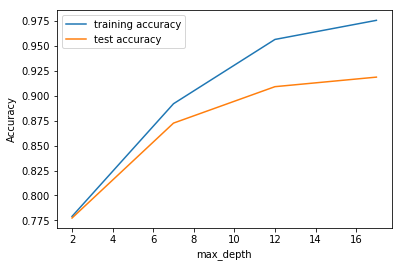

In [60]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()